<a href="https://colab.research.google.com/github/shahmeer-irfan/Titanic-Surival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Logistic Regression on Titanic Dataset
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.drop(['Cabin','Age'], axis=1, inplace=True) #too many missing values and inplace=true doesnt create no copy of dataframe but makes changes directly to original data

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [ ]:
df.drop(['PassengerId','Ticket','Name'], axis=1, inplace=True)

In [ ]:
df.head()


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [ ]:
#making new feature using sibSb and Parch
df['Family'] = df['SibSp']+df['Parch']+1

In [ ]:
df.drop(['SibSp','Parch'],axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Fare,Embarked,Family
0,0,3,male,7.2500,S,2
1,1,1,female,71.2833,C,2
2,1,3,female,7.9250,S,1
3,1,1,female,53.1000,S,2
4,0,3,male,8.0500,S,1


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Fare,0
Embarked,2
Family,0


In [ ]:
from sklearn.impute import SimpleImputer #imputing Embarked Column
imputer=SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df[['Embarked']]).flatten()

<Axes: xlabel='Survived', ylabel='Fare'>

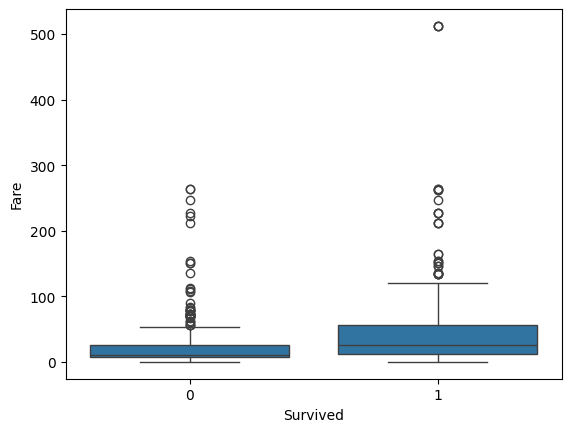

In [ ]:
sns.boxplot(data=df, x='Survived', y='Fare')

In [ ]:
df.head()

,Survived,Pclass,Sex,Fare,Embarked,Family
0,0,3,male,7.2500,S,2
1,1,1,female,71.2833,C,2
2,1,3,female,7.9250,S,1
3,1,1,female,53.1000,S,2
4,0,3,male,8.0500,S,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Apply One-Hot Encoding to 'Sex' and 'Embarked'
column_transformer = ColumnTransformer(
    transformers=[
        ('sex_embarked_enc', OneHotEncoder(drop='first'), ['Sex', 'Embarked']),
    ],
    remainder='passthrough'  # Keep other columns like Pclass, Fare, Family, etc.
)

X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_encoded, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

# 1. Predict on the test set
y_pred = model.predict(X_test_encoded)

# 2. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# 3. Print accuracy
print("Accuracy Score:", accuracy)

Accuracy Score: 0.776536312849162
